In [ ]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
import json
import yaml
from crewai import Agent, Task, Crew
from crewai_tools import SerperDevTool, ScrapeWebsiteTool
from dotenv import load_dotenv

In [ ]:
load_dotenv()

In [ ]:
# Define file paths for YAML configurations
files = {
    'agents': 'config/agents.yaml',
    'tasks': 'config/tasks.yaml'
}

# Load configurations from YAML files
configs = {}
for config_type, file_path in files.items():
    with open(file_path, 'r') as file:
        configs[config_type] = yaml.safe_load(file)

# Assign loaded configurations to specific variables
agents_config = configs['agents']
tasks_config = configs['tasks']

In [ ]:
# Creating Agents
store_manager_agent = Agent(
  config=agents_config['store_manager_agent'],
  multimodal=True,
  verbose = True,
  allow_delegation=False,
  llm = "azure/OpenAI-GPT-4o"
)

market_analyst_agent = Agent(
  config=agents_config['market_analyst_agent'],
  tools=[SerperDevTool(), ScrapeWebsiteTool()],
  verbose = True,
  allow_delegation=False,
  llm = "azure/OpenAI-GPT-4o"
)

In [ ]:
# Creating Tasks
analyze_shelf = Task(
    config = tasks_config["analyze_shelf"]
)

provide_recommendations = Task(
    config = tasks_config["provide_recommendations"]
)

create_action_plan = Task(
    config = tasks_config["create_action_plan"],
    output_file="shelf_report.md"
)

In [ ]:
# Creating Crew
crew = Crew(
  agents=[
    store_manager_agent,
    market_analyst_agent
  ],
  tasks=[
    analyze_shelf,
    provide_recommendations,
    create_action_plan
  ],
  verbose=True
)

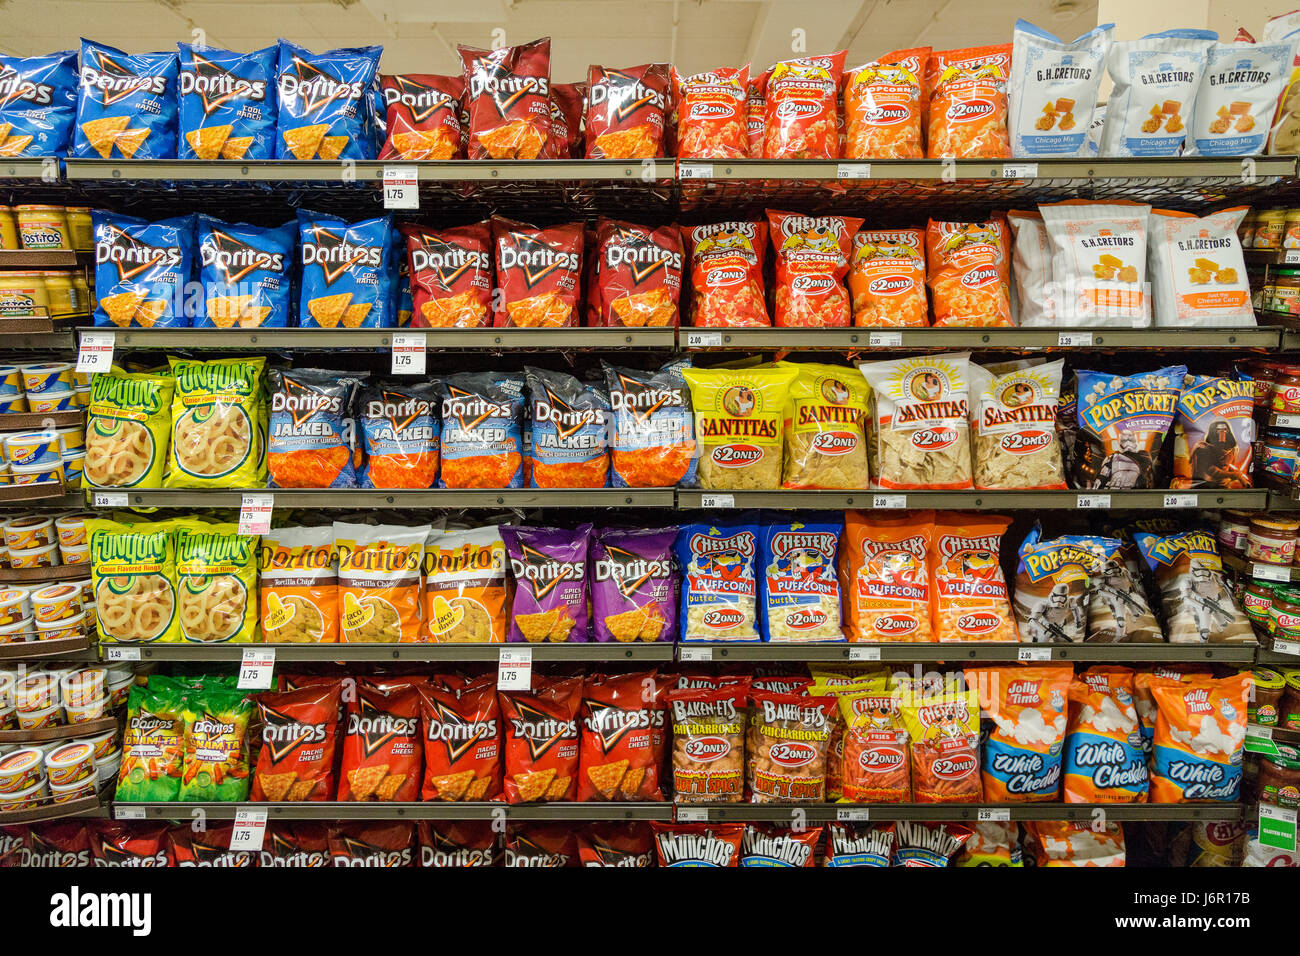

In [11]:
from IPython.display import Image
Image(filename='grocery-store-shelves-with-bags-of-junk-food-snacks-for-sale-J6R17B.jpg') 

In [9]:
# Kick off the crew and execute the process
input = {
    "shelf_url" : ".\grocery-store-shelves-with-bags-of-junk-food-snacks-for-sale-J6R17B.jpg"
}
result = crew.kickoff(inputs=input)

<>:3: DeprecationWarning: invalid escape sequence '\g'
<>:3: DeprecationWarning: invalid escape sequence '\g'
C:\Users\ANKIT\AppData\Local\Temp\ipykernel_19040\1340086982.py:3: DeprecationWarning: invalid escape sequence '\g'
  "shelf_url" : ".\grocery-store-shelves-with-bags-of-junk-food-snacks-for-sale-J6R17B.jpg"


╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: b2592f8d-847b-48f3-91da-50b4d6cdff9a                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Store Manager                                                                                           │
│                                                                                                                 │
│  Task: Analyze and extract insights from the shelf image at                                                     │
│  .\grocery-store-shelves-with-bags-of-junk-food-snacks-for-sale-J6R17B.jpg using your multimodal capabilities.  │
│          Collect visual data and caption the current product arrangement.                                       │
│          Conduct a thorough analysis of the shelf image at                                                      │
│  .\grocery-store-shelves-with-bags-of-junk-food-snacks-for-sale-J6R17B.jpg in the store.                        │
│          Prepare a detailed report highlighting the current layout, products,                                   │
│          product placement and any observed issues.                                                             │
│          Ensure the report is detailed at the level of product names.                                           │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Store Manager                                                                                           │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  **Comprehensive Report on the Shelf Image:**                                                                   │
│                                                                                                                 │
│  **Visual Data:**                                                                                               │
│  The shelf image from our store shows a variety of junk food snacks including but not limited to once such as   │
│  potato chips, popcorn, and similar snack items, displayed across multi-tiered shelving units. The popular      │
│  brands like Lay's and Doritos are positioned centrally and at eye level. Generic or lesser-known brands are    │
│  placed either on the topmost or the bottommost shelves. Bright and colorful packaging competes visually for    │
│  the attention of consumers.                                                                                    │
│                                                                                                                 │
│  **Product Placement Analysis:**                                                                                │
│  1. **Organizational Layout:** Products are organized by brand rather than type, which may offer a thematic     │
│  brand experience but might cause difficulty in locating specific types of snacks, e.g., plain chips vs.        │
│  flavored variations across different brands.                                                                   │
│  2. **Eye-Level Positioning:** Dominant brands are prominently displayed at eye level, which is beneficial for  │
│  featuring high-traffic products but may marginalize smaller or emerging brands.                                │
│  3. **Crowded Space Utilization:** Some shelves appear overcrowded, with some packages not aligned correctly.   │
│  This could lead to a "messy" appearance that might reduce the attractiveness and accessibility of the          │
│  products.                                                                                                      │
│                                                                                                                 │
│  **Observed Issues:**                                                                                           │
│  1. **Visibility:** Some products are sideways or inconsistently aligned leading to visibility issues and       │
│  hindering product recognition.                                                                                 │
│  2. **Gaps and Alignment:** There are visible gaps in the lineup which make these sections look incomplete or   │
│  not well-stocked despite available product.                                                                    │
│  3. **Cluttered Presentation:** The visual clutter resulting from dense placements may dissuade customer        │
│  movement in these areas.                                                                                       │
│                                                                                                                 │
│  **Recommendations for Improvement:**                                                                           │
│  1. **Re-organization:** Consider re-organizing the shelves by product type to facilitate easier access and     │
│  quicker customer decision-making.                     

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 6840e551-c4ab-4d40-9f5c-8ffd9307cd2c                                                                     │
│  Agent: Store Manager                                                                                           │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Market Trend Analyst                                                                                    │
│                                                                                                                 │
│  Task: Review the report on the shelf image provided by the Store Manager.                                      │
│          Utilize your knowledge of the retail market and internet to assess current trends                      │
│          relevant to the products in this shelf.                                                                │
│          Develop expert recommendations to optimize sales and customer satisfaction.                            │
│          Ensure the recommendations are detailed and includes details like product names.                       │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Market Trend Analyst                                                                                    │
│                                                                                                                 │
│  Thought: Thought: To provide expert recommendations for rearranging the shelf based on current market trends   │
│  and consumer preferences, I need to gather information on the latest trends in snack foods, including popular  │
│  products, consumer preferences, and marketing strategies. This research will help ensure the recommendations   │
│  align with what consumers are currently seeking.                                                               │
│                                                                                                                 │
│  Using Tool: Search the internet with Serper                                                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"search_query\": \"2023 snack food trends consumer preferences\"}"                                          │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  {'searchParameters': {'q': '2023 snack food trends consumer preferences', 'type': 'search', 'num': 10,         │
│  'engine': 'google'}, 'organic': [{'title': 'State of Snacking: What the Data Shows - NIQ', 'link':             │
│  'https://nielseniq.com/global/en/insights/education/2024/state-of-snacking/', 'snippet': 'Dive into the        │
│  latest snacking trends & data to understand consumer preferences, navigate the competitive landscape, & drive  │
│  growth.', 'position': 1}, {'title': 'Snack trends: Global snacks market expansion. Sweet and savory', 'link':  │
│  'https://www.innovamarketinsights.com/trends/snack-trends/', 'snippet': 'Sweet snacks often highlight reduced  │
│  negative claims, influencing around 20% of consumers when purchasing snacks. While savory snacks with high     │
│  fiber or protein ...', 'position': 2}, {'title': 'The Future Of Snacking: Emerging Snack Food Industry         │
│  Trends', 'link': 'https://them.net/the-future-of-snacking-emerging-snack-food-industry-trends/', 'snippet':    │
│  'From healthier options to innovative flavors and sustainable packaging, the latest trends show new consumer   │
│  tastes and behavior developments.', 'position': 3}, {'title': '2023 Food Trends: A Guide for Restaurants to    │
│  Stay Ahead', 'link':                                                                                           │
│  'https://www.snackpass.co/customer-stories/blog/2023-food-trends-a-guide-for-restaurants-to-stay-ahead',       │
│  'snippet': 'Offering snack-sized portions or quick, on-the-go options. · Creating baked goods and beverages    │
│  that cater to this snacking habit.', 'position': 4}, {'title': 'Five Key Snack Trends to Track in 2023 -       │
│  Euromonitor.com', 'link': 'https://www.euromonitor.com/article/five-key-snack-trends-to-track-in-2023',        │
│  'snippet': '2023 snack industry trends: staples, shopper shifts, core categories, nutrition, nostalgia &       │
│  distractions. Challenges & opportunities ahead!', 'position': 5}, {'title': 'State of Snacking Report -        │
│  Mondelēz International', 'link': 'https://www.mondelezinternational.com/stateofsnacking/', 'snippet':          │
│  "Mondelēz International's annual State of Snacking report is a global co...                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Market Trend Analyst                                                                                    │
│                                                                                                                 │
│  Thought: Thought: I have found several relevant resources that could provide insights into the current snack   │
│  food trends and consumer preferences. To pinpoint the most actionable recommendations for arranging the store  │
│  shelves, I need detailed information from one of these reports.                                                │
│                                                                                                                 │
│  Using Tool: Read website content                                                                               │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"website_url\": \"https://nielseniq.com/global/en/insights/education/2024/state-of-snacking/\"}"            │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│  State of Snacking: What the Data Shows - NIQ                                                                   │
│  Solutions                                                                                                      │
│  Industries                                                                                                     │
│  Partner Network                                                                                                │
│  Insights                                                                                                       │
│  Careers                                                                                                        │
│  About                                                                                                          │
│  Choose Language                                                                                                │
│  02_Elements/Icons/Chevron/Right                                                                                │
│  Select your preferred language                                                                                 │
│  English                                                                                                        │
│  02_Elements/Icons/Radio/Active/Unselected                                                                      │
│  02_Elements/Icons/Radio/Active/Selected                                                                        │
│  Español                                                                                                        │
│  02_Elements/Icons/Radio/Active/Unselected                                                                      │
│  02_Elements/Icons/Radio/Active/Selected                                                                        │
│  Deutsch                                                                                                        │
│  02_Elements/Icons/Radio/Active/Unselected                                                                      │
│  02_Elements/Icons/Radio/Active/Selected                                                                        │
│  Français                                                                                                       │
│  02_Elements/Icons/Radio/Active/Unselected                                                                      │
│  02_Elements/Icons/Radio/Active/Selected                                                                        │
│  Italiano                                                                                                       │
│  02_Elements/Icons/Radio/Active/Unselected                                                                      │
│  02_Elements/Icons/Radio/Active/Selected                                                                        │
│  普通话                                                                                                         │
│  02_Elements/Icons/Radio/Active/Unselected                                                                      │
│  02_Elements/Icons/Radio/Active/Selected                                                                        │
│  Português                                                                                                      │
│  02_Elements/Icons/Radio/Active/Unselected                                                                      │
│  02_Elements/Icons/Radio/Active/Selected                                                                        │
│  Pусский                                                 

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Market Trend Analyst                                                                                    │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  Based on the State of Snacking report and the comprehensive report on the shelf image, here are detailed       │
│  recommendations for rearranging the store shelf to optimize sales and customer satisfaction:                   │
│                                                                                                                 │
│  1. **Promote Healthy Snacking Options:**                                                                       │
│     - Given the rise in demand for healthy snacks such as plant-based, protein-rich, and clean label products,  │
│  allocate prominent shelf space to these categories. Highlight brands that offer snacks with added health       │
│  benefits, such as Lay's Oven Baked or Popcorners, which cater to health-conscious consumers.                   │
│                                                                                                                 │
│  2. **Incorporate Private Label Offerings:**                                                                    │
│     - Leverage the growing trend of private label snacks, which are perceived as high quality and               │
│  cost-effective. Offer a selection of store-branded healthy and organic snacks alongside traditional brands to  │
│  attract price-sensitive shoppers. This could include store-brand veggie chips or organic popcorn.              │
│                                                                                                                 │
│  3. **Sustainability and Ethical Consumption:**                                                                 │
│     - Prioritize shelf space for brands that emphasize sustainability and ethical sourcing. Look for snacks     │
│  like Terra Chips or KIND bars that use eco-friendly packaging and ethical ingredients. Highlight these         │
│  products with eco-friendly signage to appeal to environmentally conscious customers.                           │
│                                                                                                                 │
│  4. **Segment and Organize by Snacking Type and Preferences:**                                                  │
│     - Reorganize shelves by snacking category (e.g., healthy snacks, indulgent snacks, on-the-go snacks)        │
│  rather than purely by brand, facilitating easier search and selection for specific dietary needs or snack      │
│  occasions. Use clear signage to guide customers directly to their preferred snack type.                        │
│                                                                                                                 │
│  5. **Utilize Eye-Level Shelving for Emerging Trends:**                                                         │
│     - Reserve eye-level shelves for trending snack items, like plant-based snacks or innovative flavors,        │
│  rather than only established brands. This can introduce emerging brands and products to consumers who are      │
│  increasingly looking for innovative options.                                                                   │
│                                                                                                                 │
│  6. **Improve Visual Appeal and Accessibility:**                                                                │
│     - Ensure all products are front-facing and properly

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: cf024a9f-cecb-4196-bd7d-ad7cd8c853f9                                                                     │
│  Agent: Market Trend Analyst                                                                                    │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Store Manager                                                                                           │
│                                                                                                                 │
│  Task: List the recommendations from the Market Analyst,                                                        │
│          then develop a detailed action plan for Store manager and Store buyer                                  │
│          to implement the changes in markdown format without '```'.                                             │
│          Ensure the plan is practical and outlines the steps needed to rearrange                                │
│          the products effectively.                                                                              │
│          Be smart and well explained.                                                                           │
│          Give the explanation of your recommendations and the goal to achieve.                                  │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Store Manager                                                                                           │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  ### Recommendations from the Market Analyst and Action Plan                                                    │
│                                                                                                                 │
│  **Recommendations for Improvement:**                                                                           │
│                                                                                                                 │
│  1. **Re-organization by Product Type:**                                                                        │
│     - Today’s consumer looks for specific snack types, e.g., healthy vs. indulgent. Organizing by product type  │
│  rather than purely by brand improves customer navigation and satisfaction.                                     │
│                                                                                                                 │
│  2. **Enhanced Product Visibility:**                                                                            │
│     - Front-facing product alignment ensures maximum visibility and brand recognition. Remove any sideways or   │
│  misaligned products and maintain a consistent layout.                                                          │
│                                                                                                                 │
│  3. **Optimal Space Utilization:**                                                                              │
│     - Implement shelf dividers for a neat and organized look, maintaining clear boundaries between different    │
│  snack brands and types.                                                                                        │
│                                                                                                                 │
│  4. **Stock Rotation and Updates:**                                                                             │
│     - Regularly update stock to avoid the appearance of an empty shelf while also preventing overcrowding.      │
│                                                                                                                 │
│  5. **Prominent Placement of Healthier Options:**                                                               │
│     - Due to growing health trends, display healthier snack options at eye level to encourage sales of these    │
│  items.                                                                                                         │
│                                                                                                                 │
│  6. **Promotion of Private Label and Sustainable Options:**                                                     │
│     - Incorporate private label and sustainably-sourced brands, emphasizing them through signage or             │
│  promotions.                                                                                                    │
│                                                                                                                 │
│  **Practical Implementation Steps for Store Manager and Store Buyer:**                                          │
│                                                                                                                 │
│  1. **Re-organizing Shelves:**                         

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 1c09e411-27f9-46c8-80ff-580a4a8cfddc                                                                     │
│  Agent: Store Manager                                                                                           │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Crew Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Completed                                                                                       │
│  Name: crew                                                                                                     │
│  ID: b2592f8d-847b-48f3-91da-50b4d6cdff9a                                                                       │
│  Tool Args:                                                                                                     │
│  Final Output: ### Recommendations from the Market Analyst and Action Plan                                      │
│                                                                                                                 │
│  **Recommendations for Improvement:**                                                                           │
│                                                                                                                 │
│  1. **Re-organization by Product Type:**                                                                        │
│     - Today’s consumer looks for specific snack types, e.g., healthy vs. indulgent. Organizing by product type  │
│  rather than purely by brand improves customer navigation and satisfaction.                                     │
│                                                                                                                 │
│  2. **Enhanced Product Visibility:**                                                                            │
│     - Front-facing product alignment ensures maximum visibility and brand recognition. Remove any sideways or   │
│  misaligned products and maintain a consistent layout.                                                          │
│                                                                                                                 │
│  3. **Optimal Space Utilization:**                                                                              │
│     - Implement shelf dividers for a neat and organized look, maintaining clear boundaries between different    │
│  snack brands and types.                                                                                        │
│                                                                                                                 │
│  4. **Stock Rotation and Updates:**                                                                             │
│     - Regularly update stock to avoid the appearance of an empty shelf while also preventing overcrowding.      │
│                                                                                                                 │
│  5. **Prominent Placement of Healthier Options:**                                                               │
│     - Due to growing health trends, display healthier snack options at eye level to encourage sales of these    │
│  items.                                                                                                         │
│                                                                                                                 │
│  6. **Promotion of Private Label and Sustainable Options:**                                                     │
│     - Incorporate private label and sustainably-sourced brands, emphasizing them through signage or             │
│  promotions.                                                                                                    │
│                                                                                                                 │
│  **Practical Implementation Steps for Store Manager and Store Buyer:**                                          │
│                                                       